# TRAVAUX PRATIQUES GROUPE 6 K-MEANS: Prédiction du cancer de sein

# 1- Formulation d'une solution 
    Pour aborder ce problème de classification sur le cancer du sein, l'utilisation d'un modèle basé sur l'algorithme K-means pourrait être envisagée pour assigner efficacement les patients aux catégories de témoins sains ou de patientes atteintes de cancer du sein, en se basant sur leurs caractéristiques cliniques.

# 2- Collecte des données
    Nous avons recueilli le dataset sur kaggle: https://www.kaggle.com/datasets/tanshihjen/coimbra-breastcancer/data
    
    Cet ensemble de données présente une exploration complète des caractéristiques cliniques observées ou mesurées chez 64 patientes atteintes d'un cancer du sein et 52 témoins sains. L'ensemble de données comprend à la fois des attributs quantitatifs et des étiquettes correspondantes pour une analyse et une modélisation efficaces.

**Attributs quantitatifs :**

- **Âge (années):** Âge des individus.
- **IMC (kg/m²):** Indice de masse corporelle, une mesure de la graisse corporelle basée sur le poids et la taille.
- **Glucose (mg/dL):** Glycémie, un indicateur métabolique important.
- **Insuline (µU/mL):** Taux d'insuline, une hormone liée à la régulation du glucose.
- **HOMA:** Homeostatic Model Assessment, une méthode d’évaluation de la résistance à l’insuline et de la fonction des cellules bêta.
- **Leptine (ng/mL):** Taux de leptine, une hormone impliquée dans la régulation de l'appétit et de l'équilibre énergétique.
- **Adiponectine (µg/mL):** Taux d'adiponectine, une protéine associée à la régulation métabolique.
- **Résistine (ng/mL):** Niveaux de résistine, une protéine impliquée dans la résistance à l'insuline.
- **MCP-1 (pg/dL):** Monocyte Chemoattractant Protein-1, une cytokine impliquée dans l'inflammation.

**Étiquettes:**

- **1 :** Témoins sains
- **2 :** Patientes atteintes d’un cancer du sein



# 3-Prétraitement des données 
## Importation des bibliothèques


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from kneed import KneeLocator 
import missingno as msno

In [4]:
#Chargement du dataset
data=pd.read_csv('Coimbra_breast_cancer_dataset.csv')

In [5]:
# Ouverture du dataset
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [6]:
##Exploration des données

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


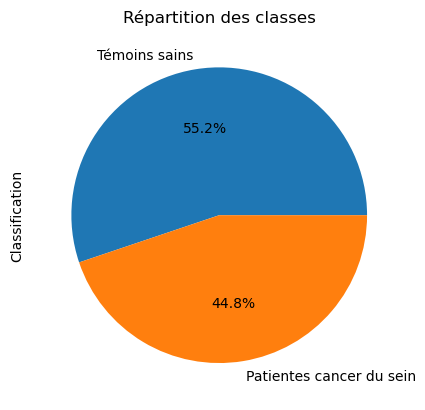

In [8]:
# Répartition des classes
data['Classification'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Témoins sains', 'Patientes cancer du sein'])
plt.title('Répartition des classes')
plt.show()


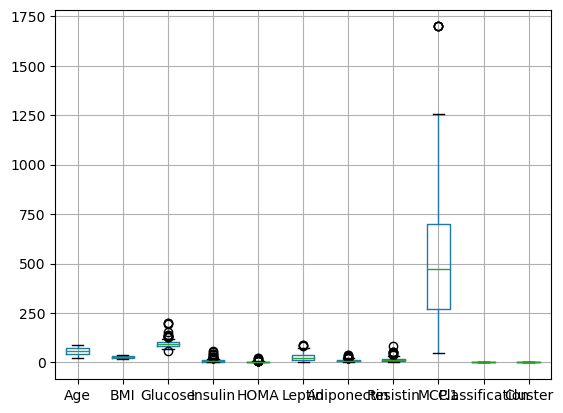

In [30]:
# Visualisation des valeurs manquantes
msno.matrix(data)

In [18]:
# Supprimer les duplications
data = data.drop_duplicates()

# Supprimer les colonnes avec des valeurs manquantes
data = data.dropna(axis=1)

# Normalisation des variables numériques
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop('Classification', axis=1)), columns=data.columns[:-1])

# Affichage des données prétraitées
print(data_scaled)

          Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0   -0.579794 -0.816675 -1.239222 -0.728739 -0.614282 -0.932334    -0.070222   
1    1.601821 -1.378751 -0.258299 -0.688038 -0.548240 -0.930413    -0.697350   
2    1.539489 -0.891764 -0.302887 -0.550073 -0.464752 -0.454219     1.797998   
3    0.666843 -1.243303 -0.927110 -0.676965 -0.574210 -0.876021    -0.441945   
4    1.788816 -1.294601 -0.258299 -0.644743 -0.521081 -1.042682    -0.786881   
..        ...       ...       ...       ...       ...       ...          ...   
111 -0.766789 -0.146468 -0.258299 -0.666590 -0.534786  1.469335     0.281654   
112  0.292852 -0.148468  0.098400 -0.546881 -0.435039 -0.741611     1.649470   
113  0.479848  0.893855 -0.035362 -0.427172 -0.365106  1.825348     1.813843   
114  0.916171 -0.398546 -0.704173 -0.717467 -0.585883 -0.086651     3.459038   
115  1.788816 -0.080447  1.792721  0.987394  1.125766  3.333167     0.576644   

     Resistin     MCP.1  
0   -0.545517

In [34]:
from sklearn.model_selection import train_test_split

# Supposons que df_scaled contient vos données prétraitées

# Séparer les données en ensembles d'entraînement 20 instances et 20 instances de test 
train_data, test_data = train_test_split(data_scaled, test_size=20, train_size=20, random_state=42)

# Afficher les tailles des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement :", len(train_data))
print("Taille de l'ensemble de test :", len(test_data))


Taille de l'ensemble d'entraînement : 20
Taille de l'ensemble de test : 20


C:\Users\DIABRO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


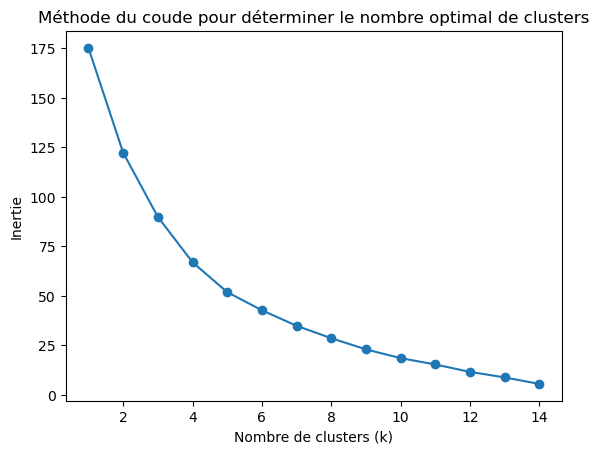

In [40]:
# Utiliser la méthode du coude pour trouver le nombre optimal de clusters (k)
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    distortions.append(kmeans.inertia_)

# Afficher la courbe elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters (k)')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Distorsion')
plt.show()

# Utiliser le KneeLocator pour trouver le nombre optimal de clusters (k)
kneedle = KneeLocator(range(1, 11), distortions, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

print("Nombre optimal de clusters (k):", optimal_k)

In [41]:
# Utiliser le nombre optimal de clusters pour entraîner le modèle K-Means
k_optimal = optimal_k
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(train_data)


          Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
93  -0.517462  0.976263  1.614371  1.483889  1.525240  0.825967     0.089974   
88  -0.579794  0.733805  4.512552  0.214471  0.903103 -0.444162    -0.891835   
67   0.417516 -1.072310  0.009225 -0.430164 -0.363209 -0.755197    -0.792055   
12  -2.013426 -0.944715 -0.704173 -0.590774 -0.515046 -0.322772     1.979683   
15  -0.829121 -1.364845 -0.525824 -0.245313 -0.301956 -0.655749     1.488032   
68  -0.704457 -1.350841 -0.436649 -0.657612 -0.538459 -0.719622     1.228265   
31  -0.268134  1.842182  0.142987  0.016252 -0.044137  0.029791     1.445472   
24  -0.205803  0.580389 -0.347474 -0.446425 -0.404205 -0.747841    -0.065968   
55  -1.452439 -0.668144 -0.258299  1.165861  0.614740 -0.517254     1.708724   
22  -1.764099  0.938026 -0.614999 -0.419191 -0.411205  0.994979    -0.582825   
62  -0.517462 -1.243303 -0.882523 -0.735423 -0.603106 -1.061818    -0.923823   
114  0.916171 -0.398546 -0.704173 -0.717

In [ ]:
# Ajouter les étiquettes de cluster à l'ensemble d'entraînement
train_data['Cluster'] = kmeans.labels_

# Prédire les clusters sur l'ensemble de test
test_data['Cluster'] = kmeans.predict(test_data.drop('Cluster', axis=1, errors='ignore'))


In [ ]:
# Calculer les corrdonnees courbe ROC
fpr, tpr, thresholds = roc_curve(test_data['Classification'], test_data['Cluster'])
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()